In [1]:
import numpy as np
import pandas as pd
import ydata_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
import time 

st = time.time()

%matplotlib inline

In [2]:
# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
from sklearn.model_selection import learning_curve

# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier 
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
#from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"C:\Users\okechukwu chude\Documents\MOdeling and optimisation\Predict students' dropout and success\Predict-students--dropout-and-academic-success\dataset.csv")

In [4]:
data.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
#checking for missing values
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [7]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Data Visualisation

In [8]:
#pp.ProfileReport(data)

In [9]:
#Dropping rows for enrolled students as this does not indicate the future outcome
#data = data.drop(data[data['Target'] == 'Enrolled'].index)

In [10]:
label_encoder = LabelEncoder()

# Apply label encoding to non-numerical columns
columns_to_encode = ['Target']
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [11]:
data.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0


In [12]:
#for i in data.columns: 
 #   sns.countplot(x = i, data = data)
  #  plt.show()

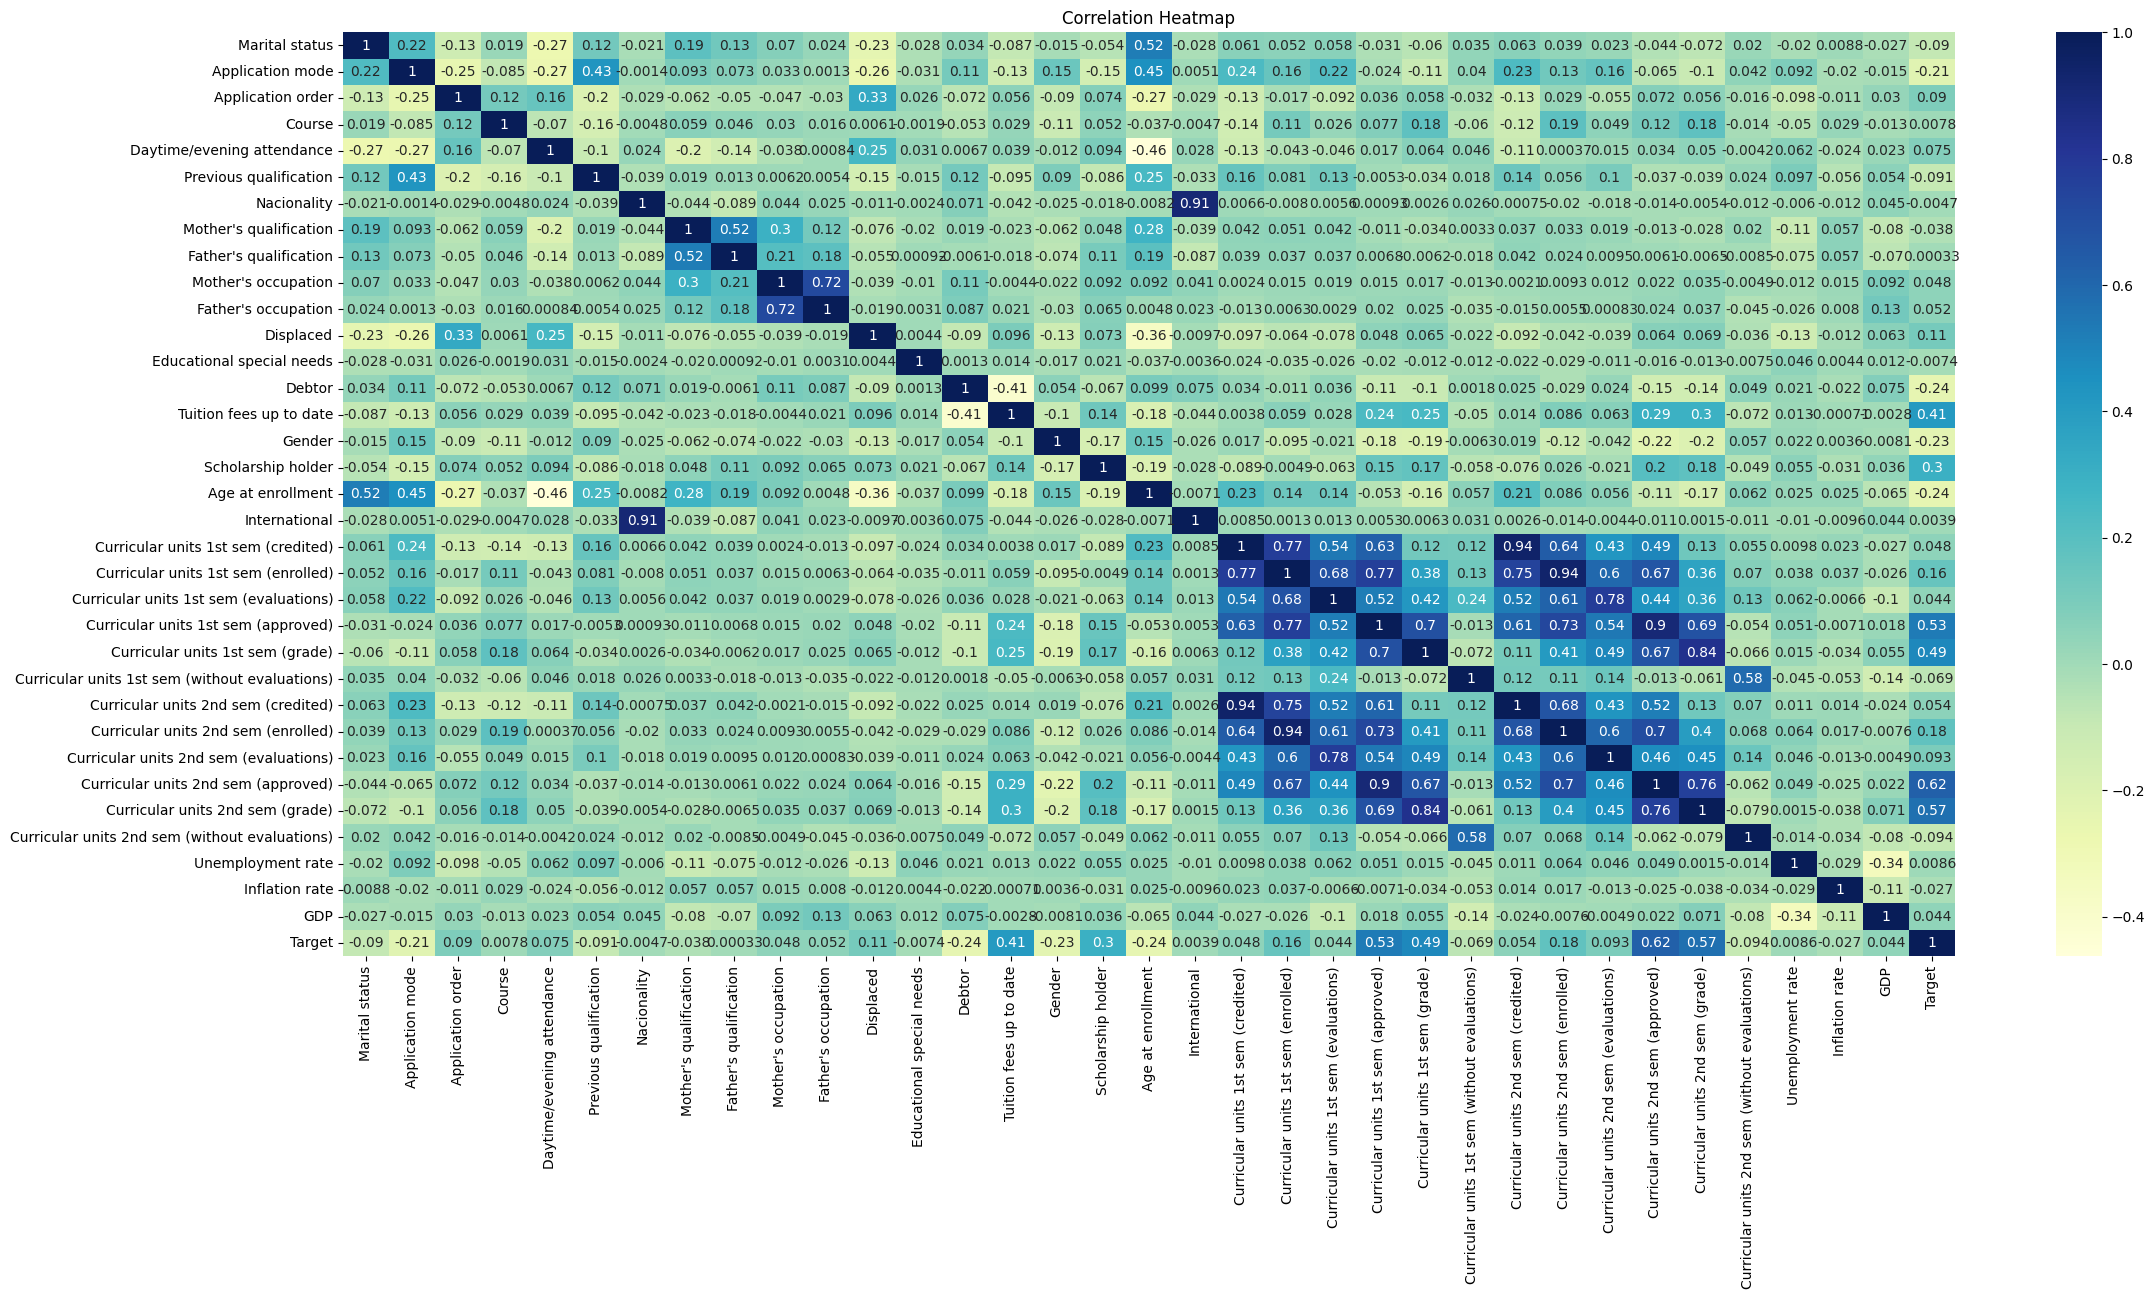

In [13]:
# Create a heat map
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(26, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
train = data.copy()
target = train.pop('Target')
train.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79


Feature Selection

In [15]:
num_features_opt = 25   # the number of features that we need to choose as a result
num_features_max = 35  
features_best = []

Uisng Pearson Correlation

In [16]:
# Threshold for removing correlated variables
threshold = 0.9

def highlight(value):
    if value > threshold:
        style = 'background-color: pink'
    else:
        style = 'background-color: palegreen'
    return style

# Absolute value correlation matrix
corr_matrix = data.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.style.format("{:.2f}").applymap(highlight)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,nan,0.22,0.13,0.02,0.27,0.12,0.02,0.19,0.13,0.07,0.02,0.23,0.03,0.03,0.09,0.01,0.05,0.52,0.03,0.06,0.05,0.06,0.03,0.06,0.03,0.06,0.04,0.02,0.04,0.07,0.02,0.02,0.01,0.03,0.09
Application mode,nan,nan,0.25,0.09,0.27,0.43,0.00,0.09,0.07,0.03,0.00,0.26,0.03,0.11,0.13,0.15,0.15,0.45,0.01,0.24,0.16,0.22,0.02,0.11,0.04,0.23,0.13,0.16,0.07,0.10,0.04,0.09,0.02,0.01,0.21
Application order,nan,nan,nan,0.12,0.16,0.20,0.03,0.06,0.05,0.05,0.03,0.33,0.03,0.07,0.06,0.09,0.07,0.27,0.03,0.13,0.02,0.09,0.04,0.06,0.03,0.13,0.03,0.06,0.07,0.06,0.02,0.10,0.01,0.03,0.09
Course,nan,nan,nan,nan,0.07,0.16,0.00,0.06,0.05,0.03,0.02,0.01,0.00,0.05,0.03,0.11,0.05,0.04,0.00,0.14,0.11,0.03,0.08,0.18,0.06,0.12,0.19,0.05,0.12,0.18,0.01,0.05,0.03,0.01,0.01
Daytime/evening attendance,nan,nan,nan,nan,nan,0.10,0.02,0.20,0.14,0.04,0.00,0.25,0.03,0.01,0.04,0.01,0.09,0.46,0.03,0.13,0.04,0.05,0.02,0.06,0.05,0.11,0.00,0.01,0.03,0.05,0.00,0.06,0.02,0.02,0.08
Previous qualification,nan,nan,nan,nan,nan,nan,0.04,0.02,0.01,0.01,0.01,0.15,0.02,0.12,0.10,0.09,0.09,0.25,0.03,0.16,0.08,0.13,0.01,0.03,0.02,0.14,0.06,0.10,0.04,0.04,0.02,0.10,0.06,0.05,0.09
Nacionality,nan,nan,nan,nan,nan,nan,nan,0.04,0.09,0.04,0.02,0.01,0.00,0.07,0.04,0.03,0.02,0.01,0.91,0.01,0.01,0.01,0.00,0.00,0.03,0.00,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.04,0.00
Mother's qualification,nan,nan,nan,nan,nan,nan,nan,nan,0.52,0.30,0.12,0.08,0.02,0.02,0.02,0.06,0.05,0.28,0.04,0.04,0.05,0.04,0.01,0.03,0.00,0.04,0.03,0.02,0.01,0.03,0.02,0.11,0.06,0.08,0.04
Father's qualification,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.21,0.18,0.06,0.00,0.01,0.02,0.07,0.11,0.19,0.09,0.04,0.04,0.04,0.01,0.01,0.02,0.04,0.02,0.01,0.01,0.01,0.01,0.08,0.06,0.07,0.00
Mother's occupation,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.72,0.04,0.01,0.11,0.00,0.02,0.09,0.09,0.04,0.00,0.01,0.02,0.02,0.02,0.01,0.00,0.01,0.01,0.02,0.04,0.00,0.01,0.02,0.09,0.05


In [17]:
# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
features_filtered = data.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  32


Using SelectFromModel with LinearSCV

In [18]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, target)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

Using Recursive Feature Elimination (RFE) with Logistic Regression

In [19]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(train, target)
rfe_support = rfe_selector.get_support()
rfe_feature = train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

34 selected features


Using Recursive Feature Elimination (RFE) with Random Forest

In [20]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
embeded_rf_selector.fit(train, target)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200),
                threshold='1.25*median')

In [21]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

11 selected features


In [22]:
features_best.append(embeded_rf_feature)

Using Variance Threshold

In [23]:
selector = VarianceThreshold(threshold=10)
np.shape(selector.fit_transform(data))
features_best.append(list(np.array(data.columns)[selector.get_support(indices=False)]))

In [24]:
#selecting the best features
features_best

[['Marital status',
  'Application mode',
  'Application order',
  'Course',
  'Daytime/evening attendance',
  'Previous qualification',
  'Nacionality',
  "Mother's qualification",
  "Father's qualification",
  "Mother's occupation",
  "Father's occupation",
  'Displaced',
  'Educational special needs',
  'Debtor',
  'Tuition fees up to date',
  'Gender',
  'Scholarship holder',
  'Age at enrollment',
  'Curricular units 1st sem (credited)',
  'Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (evaluations)',
  'Curricular units 1st sem (approved)',
  'Curricular units 1st sem (grade)',
  'Curricular units 1st sem (without evaluations)',
  'Curricular units 2nd sem (evaluations)',
  'Curricular units 2nd sem (approved)',
  'Curricular units 2nd sem (grade)',
  'Curricular units 2nd sem (without evaluations)',
  'Unemployment rate',
  'Inflation rate',
  'GDP',
  'Target'],
 ['Marital status',
  'Application mode',
  'Application order',
  'Course',
  'Daytime/evening a

In [25]:
# The element is in at least one list of optimal features
main_cols_max = features_best[0]
for i in range(len(features_best)-1):
    main_cols_max = list(set(main_cols_max) | set(features_best[i+1]))
main_cols_max

["Mother's occupation",
 'Curricular units 2nd sem (evaluations)',
 'Displaced',
 'International',
 'Nacionality',
 'Curricular units 1st sem (evaluations)',
 'Inflation rate',
 'Curricular units 1st sem (credited)',
 'Scholarship holder',
 'Curricular units 2nd sem (without evaluations)',
 'Course',
 'Curricular units 1st sem (grade)',
 "Mother's qualification",
 'Curricular units 2nd sem (credited)',
 'Curricular units 1st sem (approved)',
 'Daytime/evening attendance',
 'Curricular units 1st sem (without evaluations)',
 'Tuition fees up to date',
 'Age at enrollment',
 'Curricular units 2nd sem (grade)',
 "Father's occupation",
 'Curricular units 1st sem (enrolled)',
 'GDP',
 'Application mode',
 'Unemployment rate',
 'Target',
 'Previous qualification',
 'Debtor',
 'Curricular units 2nd sem (enrolled)',
 'Application order',
 'Educational special needs',
 'Gender',
 'Marital status',
 'Curricular units 2nd sem (approved)',
 "Father's qualification"]

In [26]:
len(main_cols_max)

35

In [27]:
# The element is in all lists of optimal features
main_cols_min = features_best[0]
for i in range(len(features_best)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(features_best[i+1])))
main_cols_min

["Mother's occupation",
 'Curricular units 1st sem (evaluations)',
 'Curricular units 2nd sem (evaluations)',
 'Age at enrollment',
 'Curricular units 2nd sem (grade)',
 "Father's occupation",
 'Course',
 'Curricular units 1st sem (grade)']

In [28]:
# Most common items in all lists of optimal features
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in data.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Target'])
df_main_cols_opt.sort_values(by=['Target'], ascending=False).head(num_features_opt)

,Target
Age at enrollment,4
Mother's occupation,4
Curricular units 1st sem (grade),4
Curricular units 2nd sem (evaluations),4
Curricular units 2nd sem (grade),4
Curricular units 1st sem (evaluations),4
Father's occupation,4
Course,4
Mother's qualification,3
Father's qualification,3


In [29]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Target').index.tolist()
if not 'Target' in main_cols:
    main_cols.append('Target')
main_cols

['Course',
 "Mother's occupation",
 "Father's occupation",
 'Age at enrollment',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (grade)',
 'Application mode',
 'Previous qualification',
 "Mother's qualification",
 "Father's qualification",
 'Tuition fees up to date',
 'Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (approved)',
 'Marital status',
 'Application order',
 'Daytime/evening attendance',
 'Nacionality',
 'Displaced',
 'Debtor',
 'Gender',
 'Scholarship holder',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Target']

Preparing the model

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
data.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0


In [32]:
# Target
target_name = 'Target'
target0 = data['Target']
train0 = data[main_cols].drop([target_name], axis=1)

In [33]:
test_train_split_part = 0.2
cv_n_split = 3
random_state = 40

# For boosting model
train0b = train0.copy()

# Synthesis valid as "test" for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, target0, test_size=test_train_split_part, random_state=random_state)

In [34]:
# For models from Sklearn
scaler = MinMaxScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)
#scaler2 = StandardScaler()
scaler2 = RobustScaler()
train0 = pd.DataFrame(scaler2.fit_transform(train0), columns = train0.columns)

In [35]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, target0, test_size=test_train_split_part, random_state=random_state)

In [36]:
train.head(3)

,Course,Mother's occupation,Father's occupation,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Application mode,Previous qualification,...,Marital status,Application order,Daytime/evening attendance,Nacionality,Displaced,Debtor,Gender,Scholarship holder,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled)
1707,-0.142857,0.6,0.4,-0.166667,-0.75,-0.639881,-0.50,0.019355,-0.636364,0.0000,...,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.5
2499,0.000000,0.8,0.4,3.333333,1.25,-0.952381,0.50,1.083871,0.363636,0.6875,...,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0
2735,0.285714,0.8,0.4,0.000000,-0.25,1.297619,-0.25,1.238710,-0.636364,0.0000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5


In [37]:
metrics_all = {1 : 'r2_score', 2: 'acc', 3 : 'rmse', 4 : 're'}
metrics_now = [1, 2, 3, 4]

In [38]:
# list of accuracy of all model - amount of metrics_now * 2 (train & test datasets)
num_models = 6
acc_train = []
acc_test = []
acc_all = np.empty((len(metrics_now)*2, 0)).tolist()
acc_all

[[], [], [], [], [], [], [], []]

In [39]:
acc_all_pred = np.empty((len(metrics_now), 0)).tolist()
acc_all_pred

[[], [], [], []]

In [40]:
# Splitting train data for model tuning with cross-validation
from sklearn.model_selection import ShuffleSplit
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

In [41]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [42]:
def plot_cm(target, train_pred, target_test, test_pred):
    # Building the confusion matrices
    
    def cm_calc(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
        cm_sum = np.sum(cm, axis=1, keepdims=True)
        cm_perc = cm / cm_sum.astype(float) * 100
        annot = np.empty_like(cm).astype(str)
        nrows, ncols = cm.shape
        for i in range(nrows):
            for j in range(ncols):
                c = cm[i, j]
                p = cm_perc[i, j]
                if i == j:
                    s = cm_sum[i]
                    annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%.1f%%\n%d' % (p, c)
        cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
        cm.index.name = 'Actual'
        cm.columns.name = 'Predicted'
        return cm, annot

    
    # Building the confusion matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=True)
    
    # Training data
    ax = axes[0]
    ax.set_title("for training data")
    cm0, annot0 = cm_calc(target, train_pred)    
    sns.heatmap(cm0, cmap= "YlGnBu", annot=annot0, fmt='', ax=ax)
    
    # Test data
    ax = axes[1]
    ax.set_title("for test (validation) data")
    cm1, annot1 = cm_calc(target_test, test_pred)
    sns.heatmap(cm1, cmap= "YlGnBu", annot=annot1, fmt='', ax=ax)
    
    fig.suptitle('CONFUSION MATRICES')
    plt.show()

In [43]:
def acc_metrics_calc(num,model,train,test,target,target_test):
    # The models selection stage
    # Calculation of accuracy of model by different metrics
    global acc_all

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)
    if num != 17:
        print('target = ', target[:5].values)
        print('ytrain = ', ytrain[:5])
        print('target_test =', target_test[:5].values)
        print('ytest =', ytest[:5])

    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
            acc_test = round(r2_score(target_test, ytest) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
            acc_test = round(metrics.accuracy_score(target_test, ytest) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
            acc_test = round(acc_rmse(target_test, ytest) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)
            acc_test = round(acc_d(target_test, ytest) * 100, 2)
        
        print('acc of', metrics_all[x], 'for train =', acc_train)
        print('acc of', metrics_all[x], 'for test =', acc_test)
        acc_all[num_acc].append(acc_train) #train
        acc_all[num_acc+1].append(acc_test) #test
        num_acc += 2
    
    #  Building the confusion matrices
    plot_cm(target, ytrain, target_test, ytest)

In [44]:
def acc_metrics_calc_pred(num,model,name_model,train,test,target):
    # The prediction stage
    # Calculation of accuracy of model for all different metrics and creates of the main submission file for the best model (num=0)
    global acc_all_pred

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)

    print('**********')
    print(name_model)
    if num != 17:
        print('target = ', target[:15].values)
        print('ytrain = ', ytrain[:15])
        print('ytest =', ytest[:15])
    
    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)

        print('acc of', metrics_all[x], 'for train =', acc_train)
        acc_all_pred[num_acc].append(acc_train) #train
        num_acc += 1
    
    # Save the submission file
    submission[target_name] = ytest
    submission.to_csv('submission_' + name_model + '.csv', index=False)    

Tuning and Testing features

In [45]:
# Thanks to https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, cv=None, axes=None, ylim=None, 
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), random_state=0):
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator=estimator, X=X, y=y, cv=cv,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    plt.show()
    return

Support Vector Machines

{'kernel': 'rbf', 'tol': 0.001}
target =  [1 0 2 2 0]
ytrain =  [2 0 2 2 0]
target_test = [2 2 2 2 0]
ytest = [2 2 2 2 2]
acc of r2_score for train = 53.04
acc of r2_score for test = 43.16
acc of acc for train = 79.17
acc of acc for test = 75.14
acc of rmse for train = 60.91
acc of rmse for test = 66.72
acc of re for train = 22.2
acc of re for test = 27.07


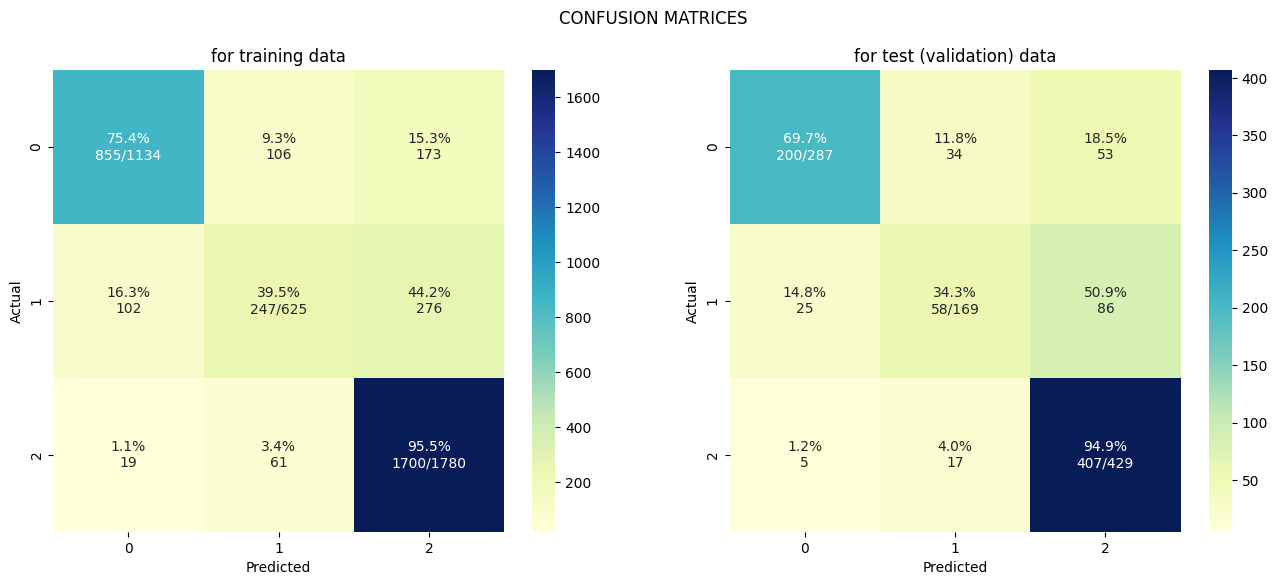

In [46]:
# Support Vector Machines
from sklearn.model_selection import GridSearchCV
svr = SVC()
svr_CV = GridSearchCV(svr, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                       'tol': [1e-3]}, 
                      cv=cv_train, verbose=False)
svr_CV.fit(train, target)
print(svr_CV.best_params_)
acc_metrics_calc(1,svr_CV,train,test,target,target_test)

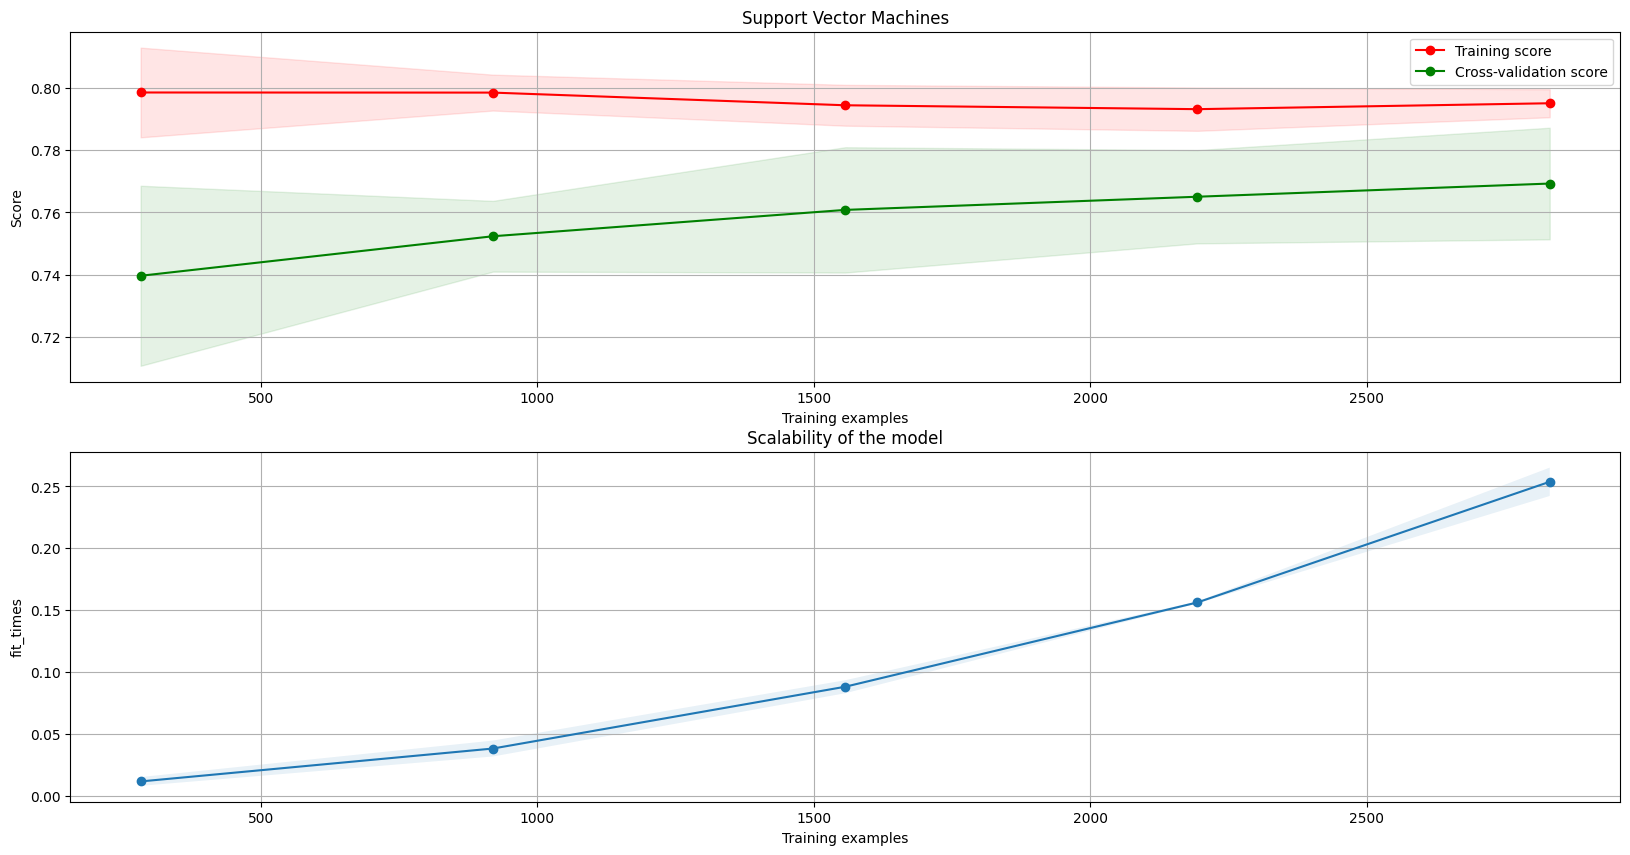

In [47]:
# Building learning curve of model
plot_learning_curve(svr, "Support Vector Machines", train, target, cv=cv_train)

MLP Classifier

{'hidden_layer_sizes': 2, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
target =  [1 0 2 2 0]
ytrain =  [2 0 2 2 0]
target_test = [2 2 2 2 0]
ytest = [2 2 2 2 2]
acc of r2_score for train = 47.93
acc of r2_score for test = 44.32
acc of acc for train = 77.34
acc of acc for test = 76.05
acc of rmse for train = 64.14
acc of rmse for test = 66.04
acc of re for train = 24.37
acc of re for test = 26.29


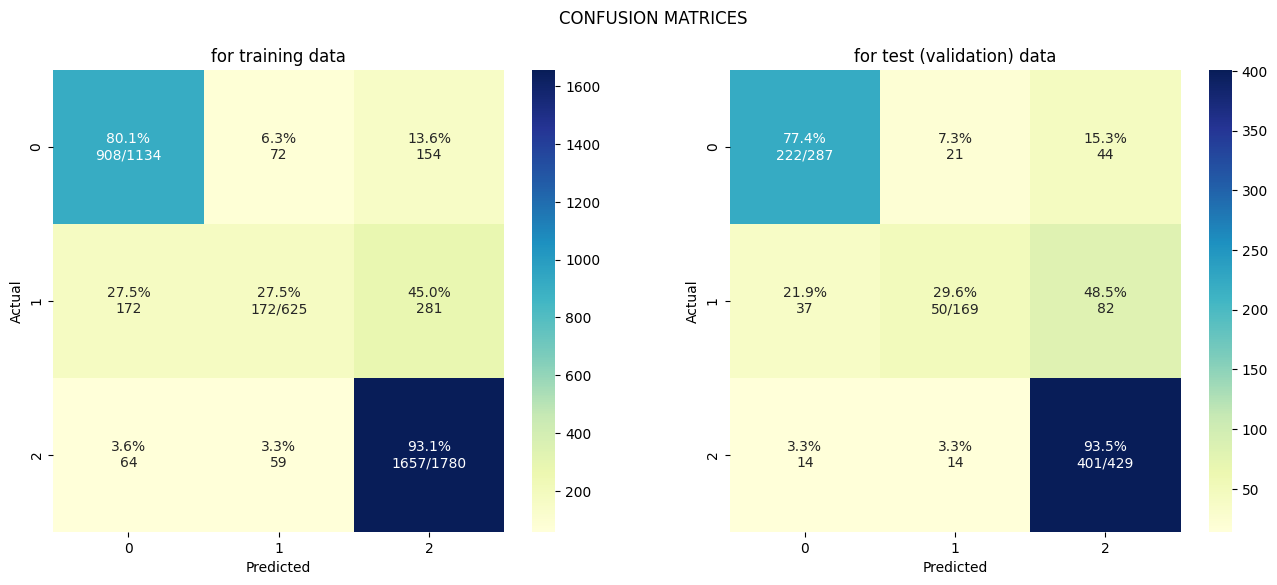

CPU times: total: 25 s
Wall time: 26.7 s


In [48]:
%%time
# MLPClassifier

mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [i for i in range(2,5)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [1000]
              }
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=False)
mlp_GS.fit(train, target)
print(mlp_GS.best_params_)
acc_metrics_calc(3,mlp_GS,train,test,target,target_test)

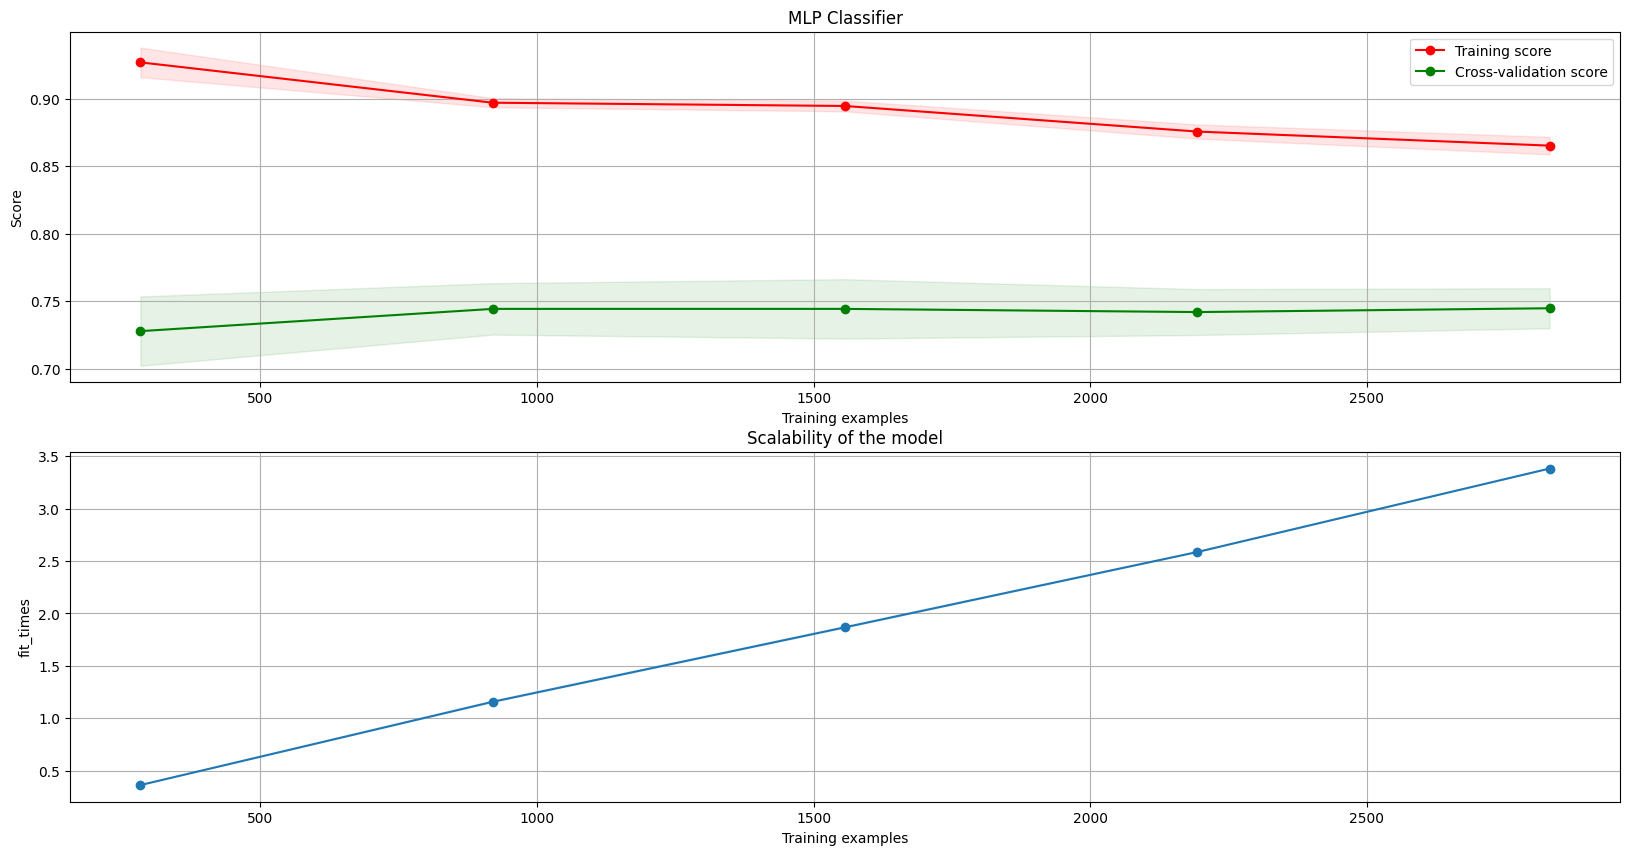

In [49]:
# Building learning curve of model
plot_learning_curve(mlp, "MLP Classifier", train, target, cv=cv_train)

Stochastic Gradient Descent

{'alpha': 0.035}
target =  [1 0 2 2 0]
ytrain =  [2 0 2 2 0]
target_test = [2 2 2 2 0]
ytest = [2 2 2 2 2]
acc of r2_score for train = 35.77
acc of r2_score for test = 32.63
acc of acc for train = 74.09
acc of acc for test = 72.66
acc of rmse for train = 71.24
acc of rmse for test = 72.64
acc of re for train = 28.91
acc of re for test = 30.87


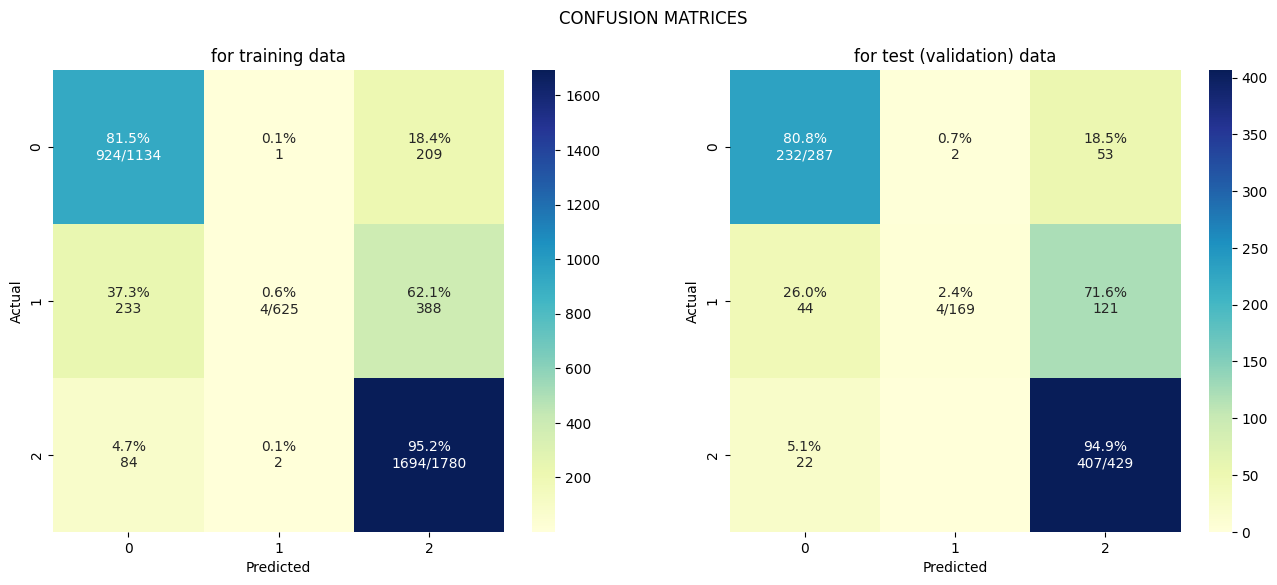

In [50]:
# Stochastic Gradient Descent

sgd = SGDClassifier(early_stopping=True)
param_grid = {'alpha': [0.035, 0.04, 0.45]}
sgd_CV = GridSearchCV(sgd, param_grid=param_grid, cv=cv_train, verbose=False)
sgd_CV.fit(train, target)
print(sgd_CV.best_params_)
acc_metrics_calc(4,sgd_CV,train,test,target,target_test)

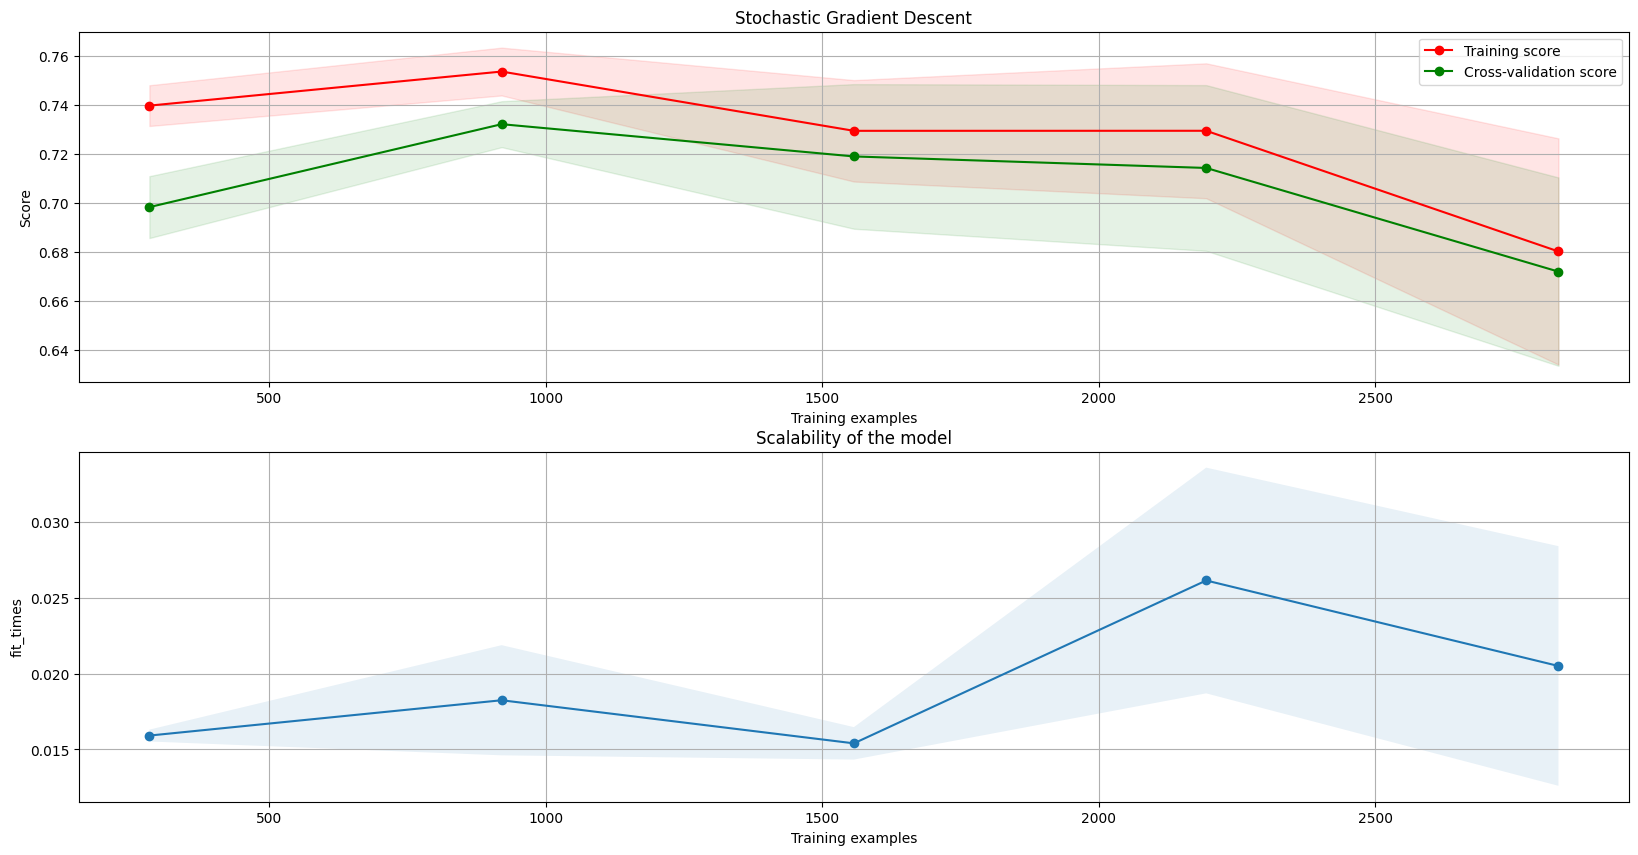

In [51]:
# Building learning curve of model
plot_learning_curve(sgd, "Stochastic Gradient Descent", train, target, cv=cv_train)

Decision Tree classifier

{'min_samples_leaf': 8}
target =  [1 0 2 2 0]
ytrain =  [2 0 2 2 0]
target_test = [2 2 2 2 0]
ytest = [2 2 2 2 2]
acc of r2_score for train = 59.51
acc of r2_score for test = 32.34
acc of acc for train = 82.85
acc of acc for test = 71.07
acc of rmse for train = 56.56
acc of rmse for test = 72.8
acc of re for train = 18.69
acc of re for test = 31.84


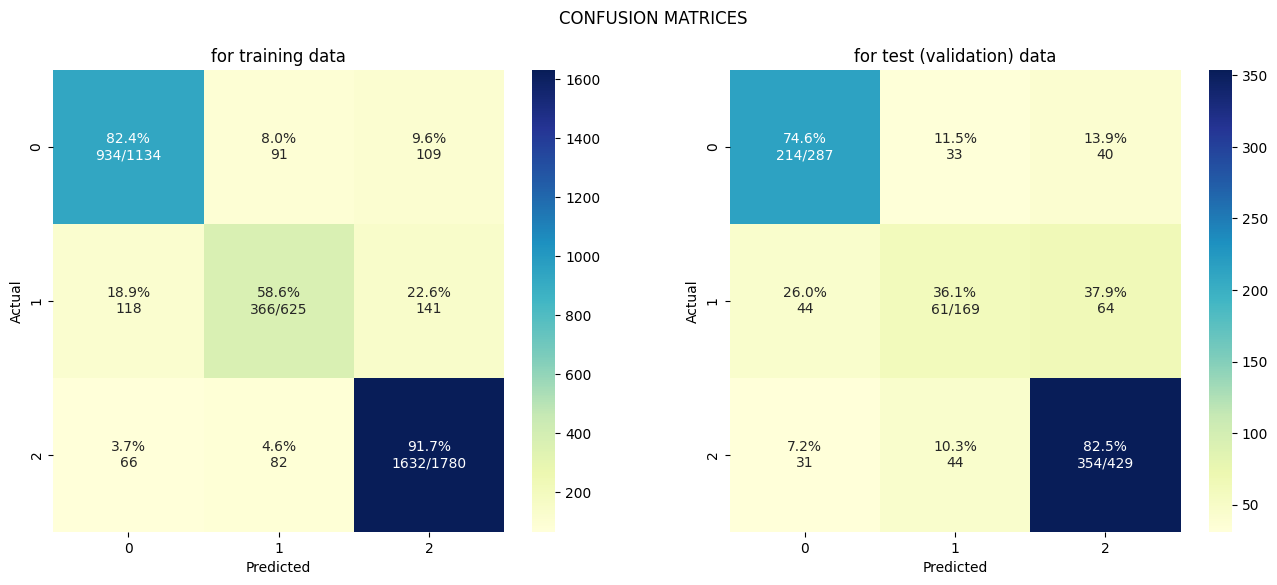

In [52]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [i for i in range(2,10)]}
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(train, target)
print(decision_tree_CV.best_params_)
acc_metrics_calc(5,decision_tree_CV,train,test,target,target_test)

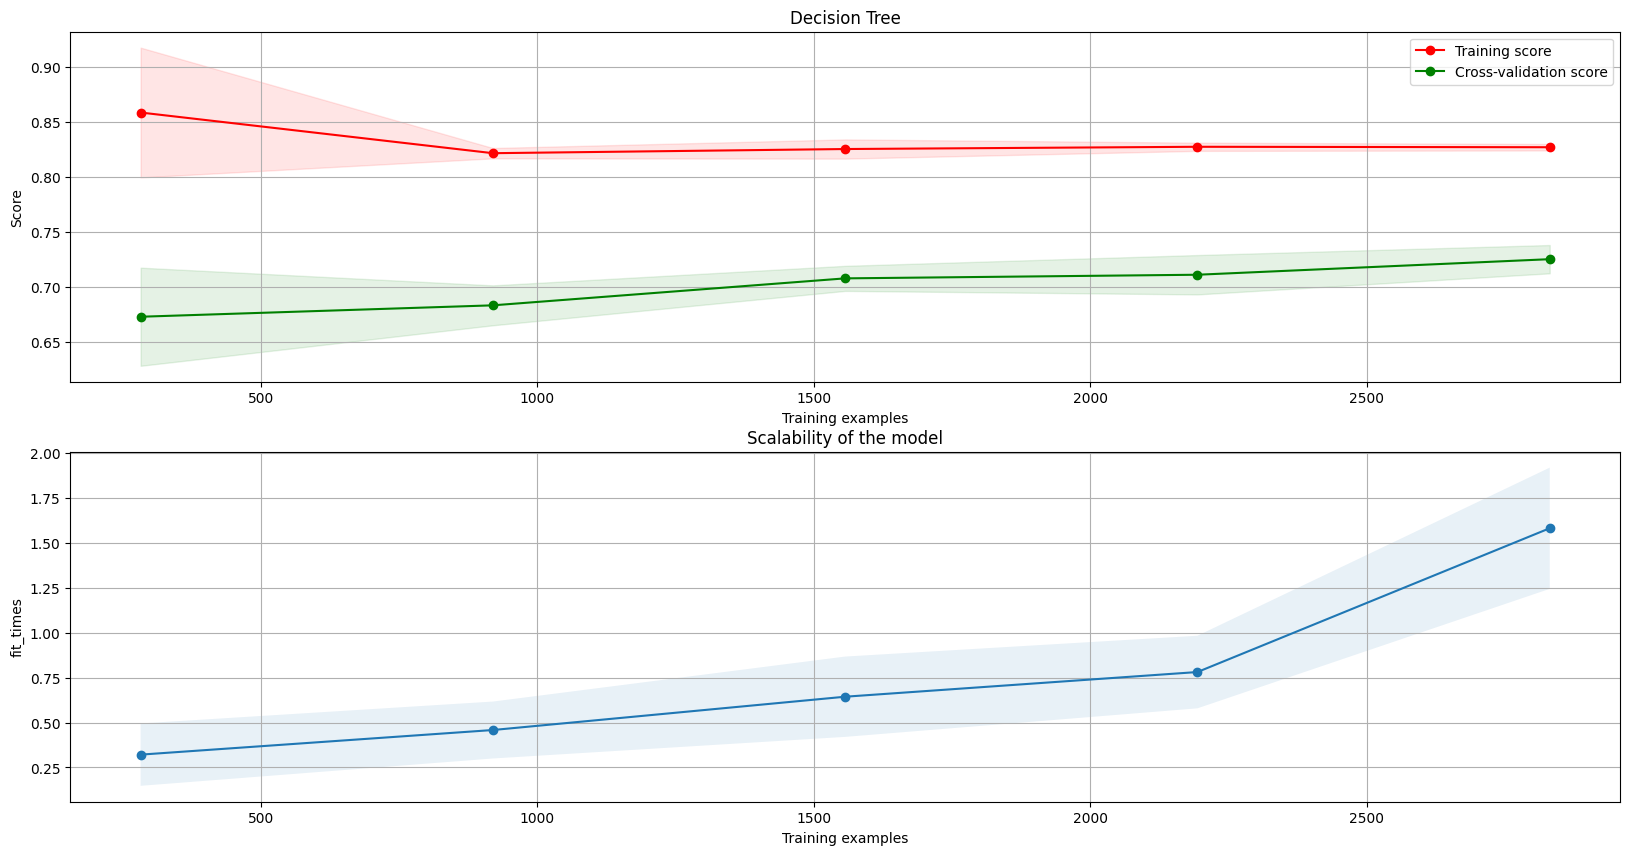

In [53]:
# Building learning curve of model
plot_learning_curve(decision_tree_CV, "Decision Tree", train, target, cv=cv_train)

In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import xgboost as xgb

Best score: 0.779
Best parameters set: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 80}
target =  [1 0 2 2 0]
ytrain =  [2 0 2 2 0]
target_test = [2 2 2 2 0]
ytest = [2 2 2 2 2]
acc of r2_score for train = 61.37
acc of r2_score for test = 43.45
acc of acc for train = 83.47
acc of acc for test = 75.71
acc of rmse for train = 55.24
acc of rmse for test = 66.55
acc of re for train = 17.92
acc of re for test = 26.68


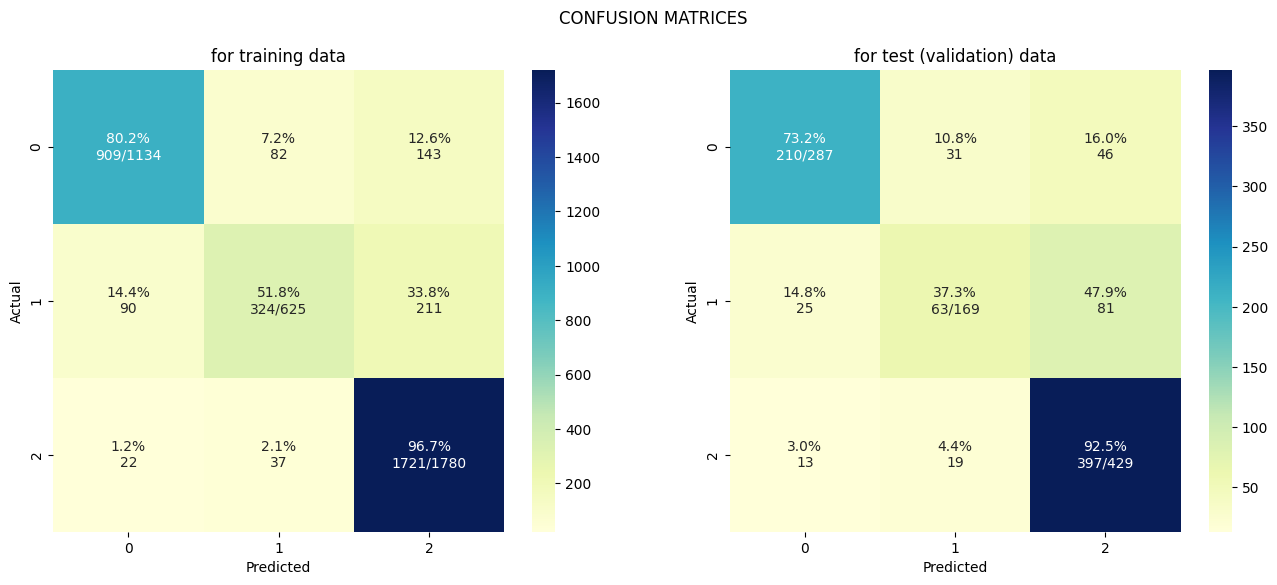

CPU times: total: 8min 15s
Wall time: 1min 13s


In [56]:
%%time
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='reg:squarederror') 
parameters = {'n_estimators': [50, 60, 70, 80, 90], 
              'learning_rate': [0.09, 0.1, 0.15, 0.2],
              'max_depth': [3, 4, 5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=cv_train).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_metrics_calc(7,xgb_reg,trainb,testb,targetb,target_testb)

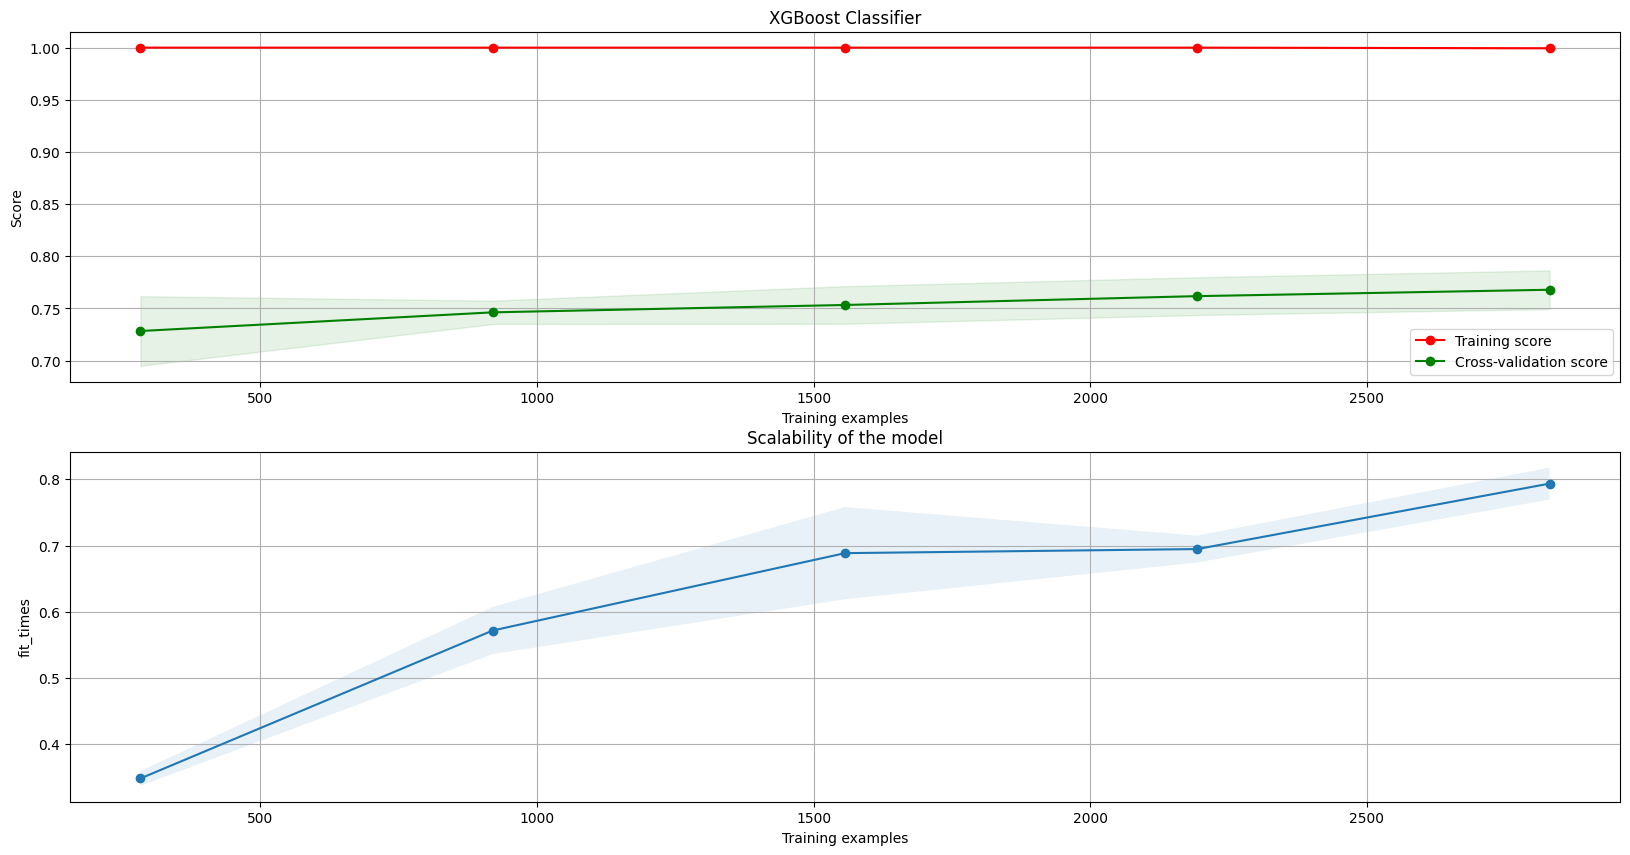

In [57]:
# Building learning curve of model
plot_learning_curve(xgb_clf, "XGBoost Classifier", trainb, targetb, cv=cv_train)

Neural Network with Keras

Epoch 1/100
177/177 [==============================] - 2s 4ms/step - loss: -0.4287 - accuracy: 0.2914 - val_loss: -1.8327 - val_accuracy: 0.2768
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: -3.6118 - accuracy: 0.3073 - val_loss: -7.0746 - val_accuracy: 0.2924
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: -10.7975 - accuracy: 0.3123 - val_loss: -17.9873 - val_accuracy: 0.3037
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: -23.1982 - accuracy: 0.3225 - val_loss: -34.5809 - val_accuracy: 0.3178
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: -40.7379 - accuracy: 0.3282 - val_loss: -56.8258 - val_accuracy: 0.3178
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: -63.0165 - accuracy: 0.3271 - val_loss: -83.9037 - val_accuracy: 0.3263
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: -89.6663 - accuracy: 0.3331 - val_loss: -115.89

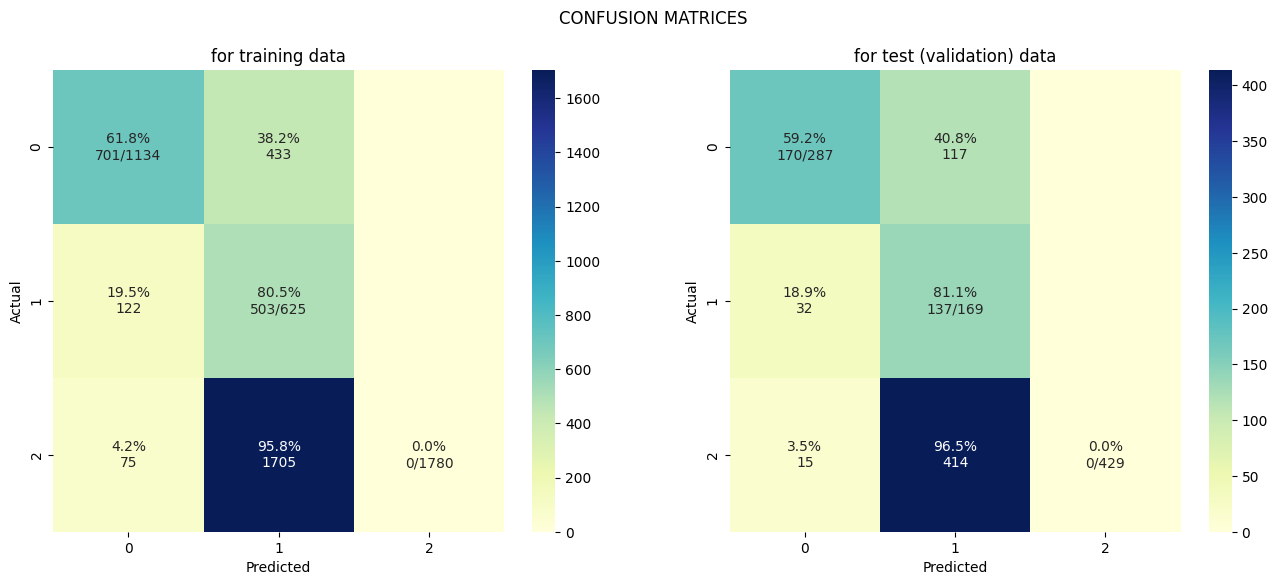

In [58]:
def build_nn(optimizer='adam'):

    # Initializing the NN
    nn = Sequential()

    # Adding the input layer and the first hidden layer of the NN
    nn.add(Dense(units=32, kernel_initializer='he_normal', activation='relu', input_shape=(len(train0.columns),)))
    # Adding the output layer
    nn.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

    # Compiling the NN
    nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return nn

Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=test_train_split_part, random_state=random_state)
nn_model = build_nn(optimizers.Adam(lr=0.0001))
nn_model.fit(Xtrain, Ztrain, batch_size=16, epochs=100, validation_data=(Xval, Zval))
acc_metrics_calc(17,nn_model,train,test,target,target_test)

Gaussian Process

{'max_iter_predict': 70, 'n_restarts_optimizer': 2, 'warm_start': False}
target =  [1 0 2 2 0]
ytrain =  [1 0 2 2 0]
target_test = [2 2 2 2 0]
ytest = [2 2 2 2 2]
acc of r2_score for train = 75.47
acc of r2_score for test = 40.57
acc of acc for train = 90.19
acc of acc for test = 73.45
acc of rmse for train = 44.03
acc of rmse for test = 68.23
acc of re for train = 10.99
acc of re for test = 28.63


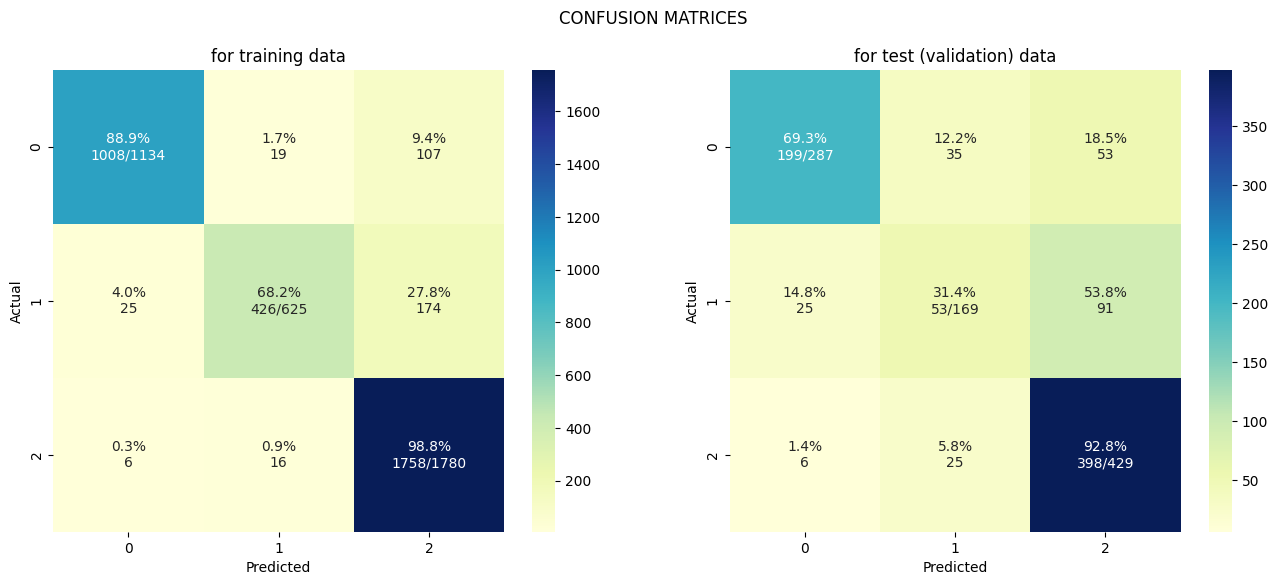

In [59]:
gpc = GaussianProcessClassifier()
param_grid = {'max_iter_predict': [70, 80, 90],
              'warm_start': [False],
              'n_restarts_optimizer': range(2,4)}
gpc_CV = GridSearchCV(estimator=gpc, param_grid=param_grid, cv=cv_train, verbose=False)
gpc_CV.fit(train, target)
print(gpc_CV.best_params_)
acc_metrics_calc(18,gpc_CV,train,test,target,target_test)

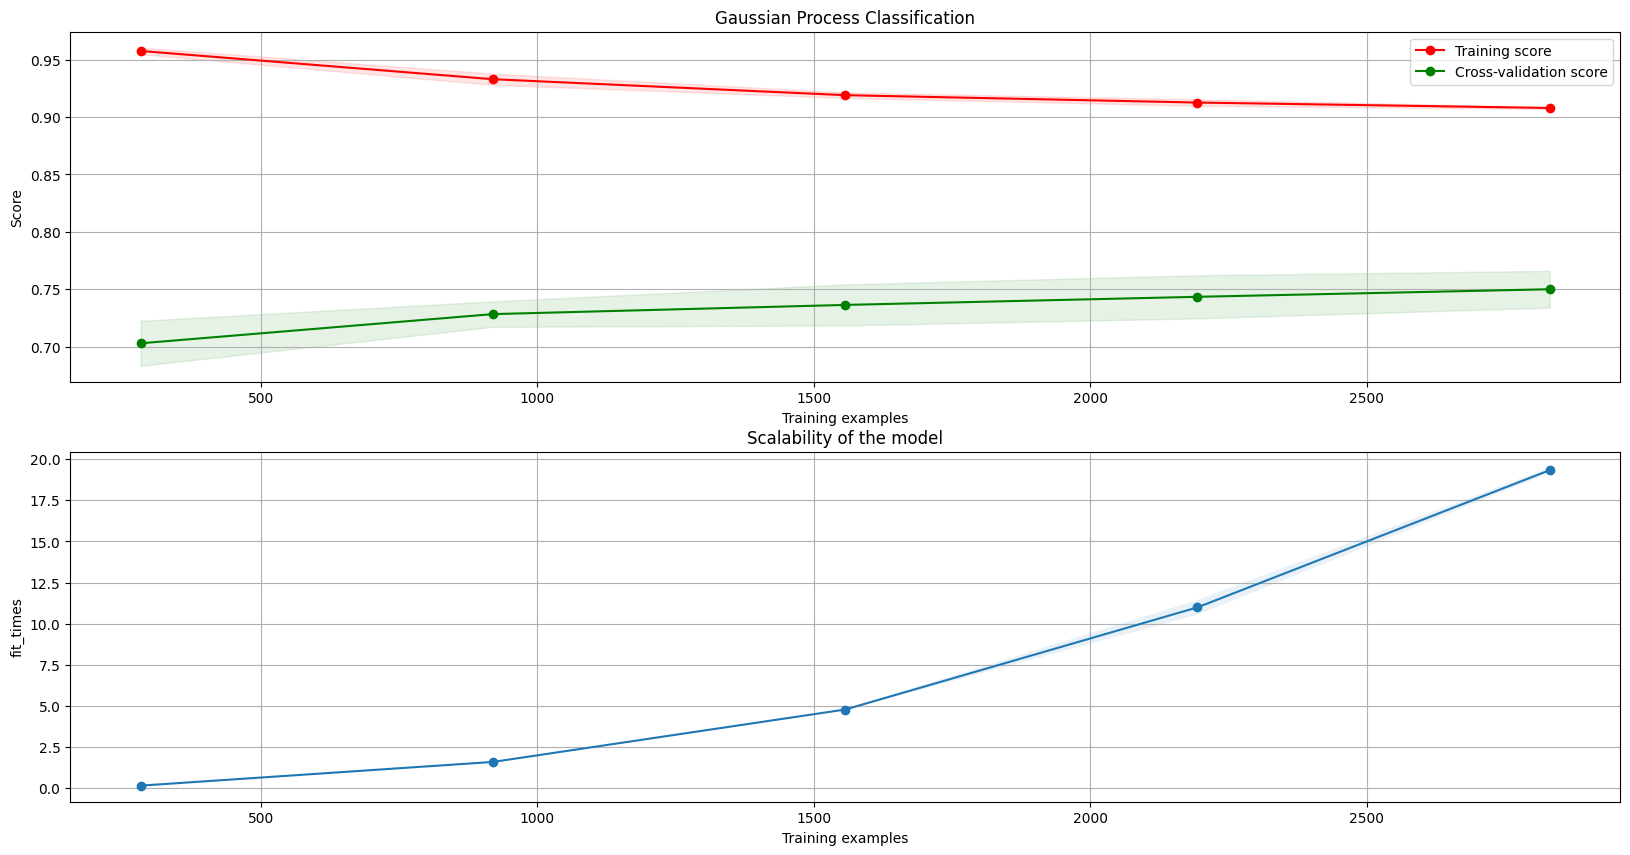

In [60]:
# Building learning curve of model
plot_learning_curve(gpc, "Gaussian Process Classification", train, target, cv=cv_train)

Model Evaluation

In [61]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','MLP Classifier', 'Stochastic Gradient Decent', 'Decision Tree Classifier','XGB Classifier',
              'NN model', 'Gaussian Process Classification'  ]})

In [62]:
for x in metrics_now:
    xs = metrics_all[x]
    models[xs + '_train'] = acc_all[(x-1)*2]
    models[xs + '_test'] = acc_all[(x-1)*2+1]
    if xs == "acc":
        models[xs + '_diff'] = models[xs + '_train'] - models[xs + '_test']

In [63]:
print('Prediction accuracy for models')
ms = metrics_all[metrics_now[1]] # the first from metrics
models[['Model', ms + '_train', ms + '_test', 'acc_diff']].sort_values(by=[(ms + '_test'), (ms + '_train')], ascending=False)

Prediction accuracy for models


,Model,acc_train,acc_test,acc_diff
1,MLP Classifier,77.34,76.05,1.29
4,XGB Classifier,83.47,75.71,7.76
0,Support Vector Machines,79.17,75.14,4.03
6,Gaussian Process Classification,90.19,73.45,16.74
2,Stochastic Gradient Decent,74.09,72.66,1.43
3,Decision Tree Classifier,82.85,71.07,11.78
5,NN model,34.02,34.69,-0.67


In [64]:
pd.options.display.float_format = '{:,.2f}'.format

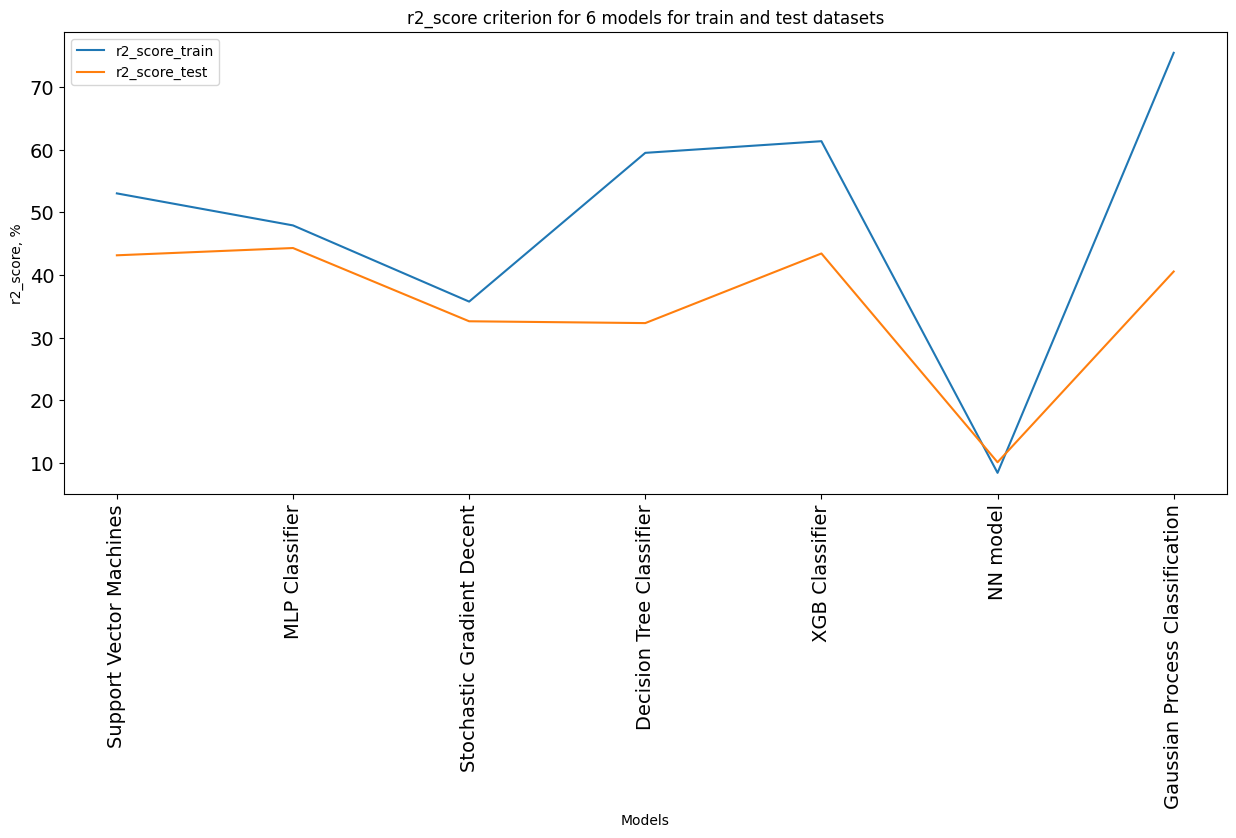

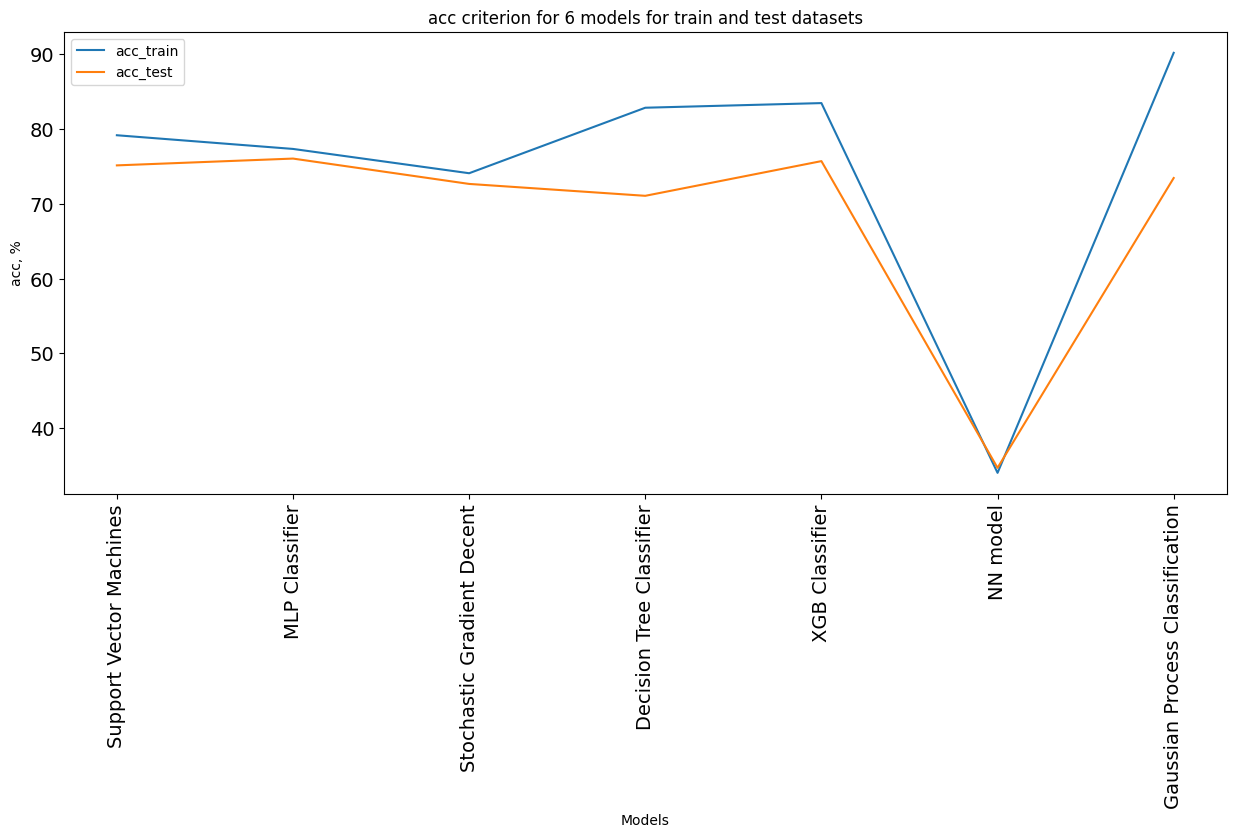

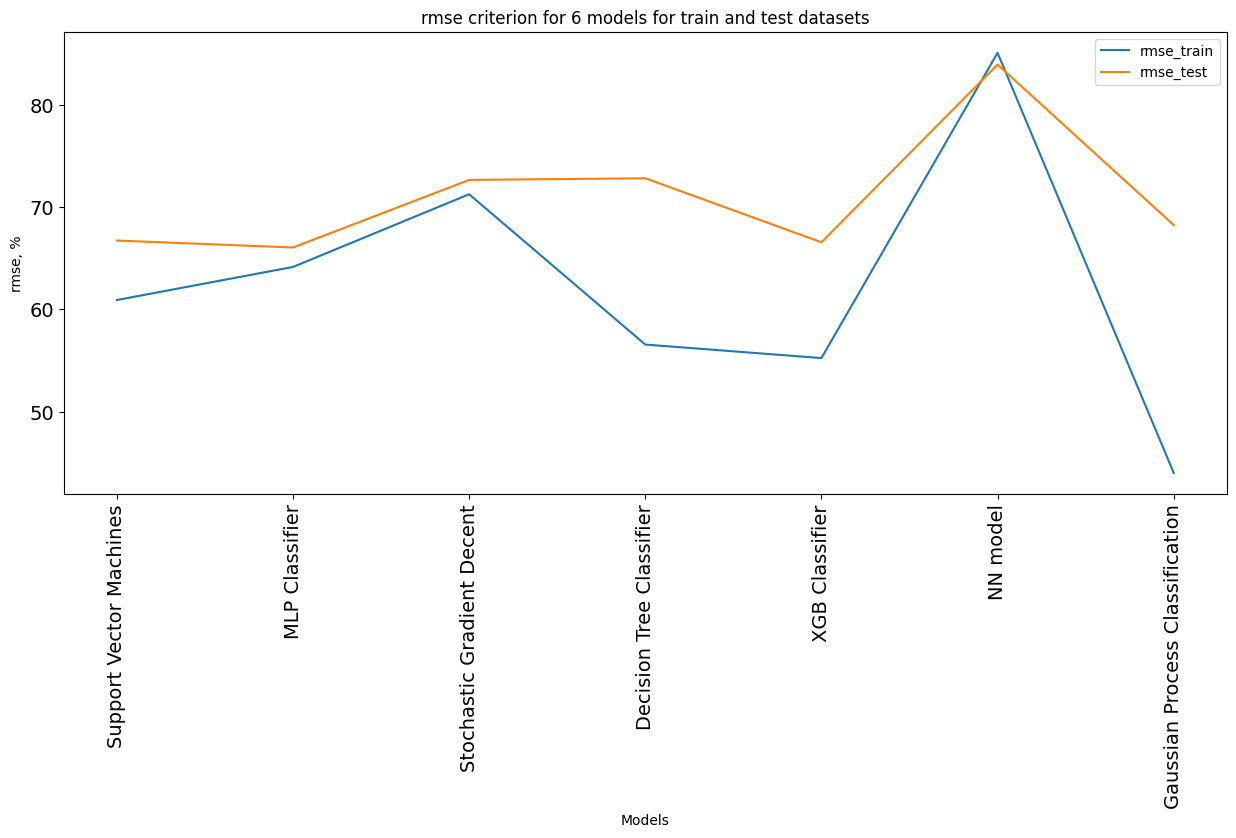

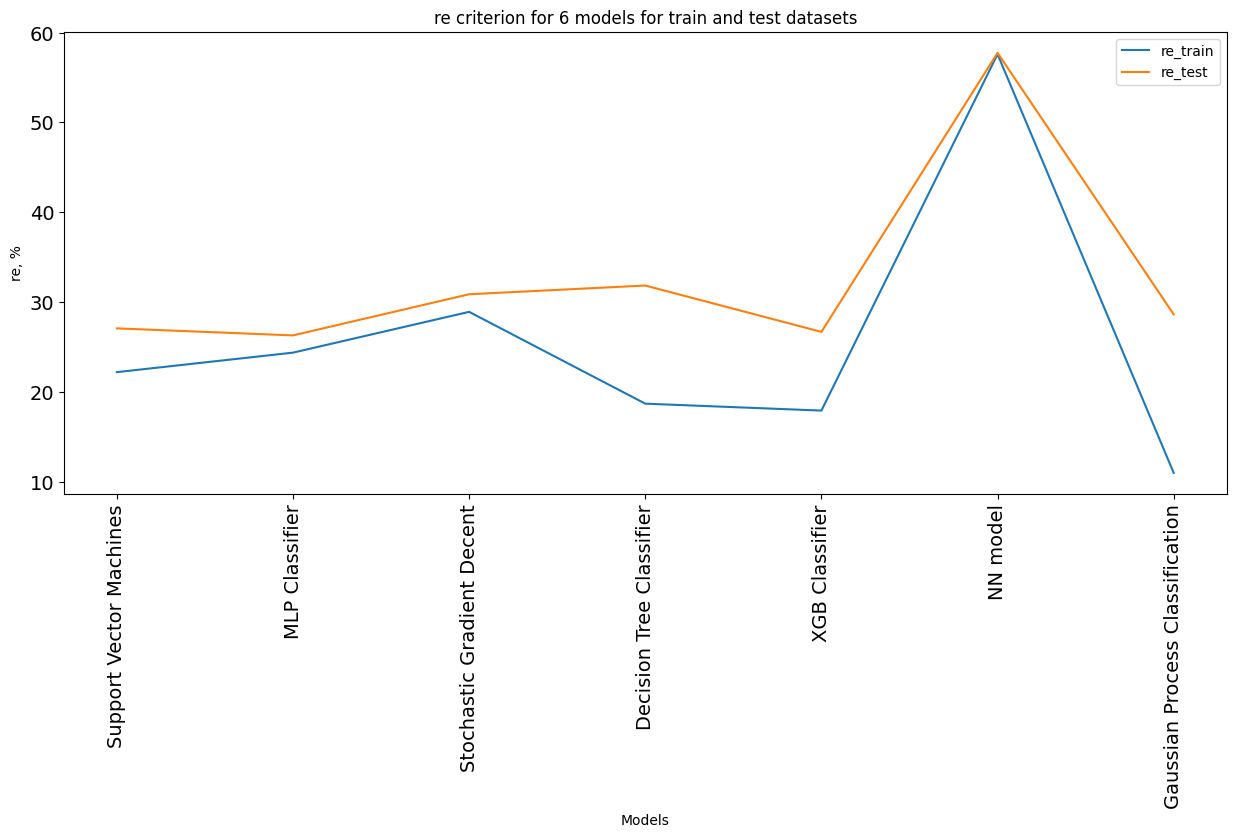

In [65]:
for x in metrics_now:   
    # Plot
    xs = metrics_all[x]
    xs_train = metrics_all[x] + '_train'
    xs_test = metrics_all[x] + '_test'
    plt.figure(figsize=[15,6])
    xx = models['Model']
    plt.tick_params(labelsize=14)
    plt.plot(xx, models[xs_train], label = xs_train)
    plt.plot(xx, models[xs_test], label = xs_test)
    plt.legend()
    plt.title(str(xs) + ' criterion for ' + str(num_models) + ' models for train and test datasets')
    plt.xlabel('Models')
    plt.ylabel(xs + ', %')
    plt.xticks(xx, rotation='vertical')
    plt.show()

Extension

In [66]:
# Split the data and targets into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
        train, target, test_size=0.2, random_state=3)

In [67]:
# Support Vector Machines
from sklearn.model_selection import GridSearchCV
svr = SVC()
svr_CV = GridSearchCV(svr, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                       'tol': [1e-3]}, 
                      cv=cv_train, verbose=False)
svr_CV.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=40, test_size=0.2, train_size=None),
             estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.001]},
             verbose=False)

{'kernel': 'linear', 'tol': 0.001}
target =  [1 0 2 2 0]
ytrain =  [2 0 2 2 0]
target_test = [2 2 2 2 0]
ytest = [2 2 2 2 2]
acc of r2_score for train = 49.36
acc of r2_score for test = 43.02
acc of acc for train = 77.11
acc of acc for test = 75.37
acc of rmse for train = 63.25
acc of rmse for test = 66.81
acc of re for train = 24.18
acc of re for test = 26.97


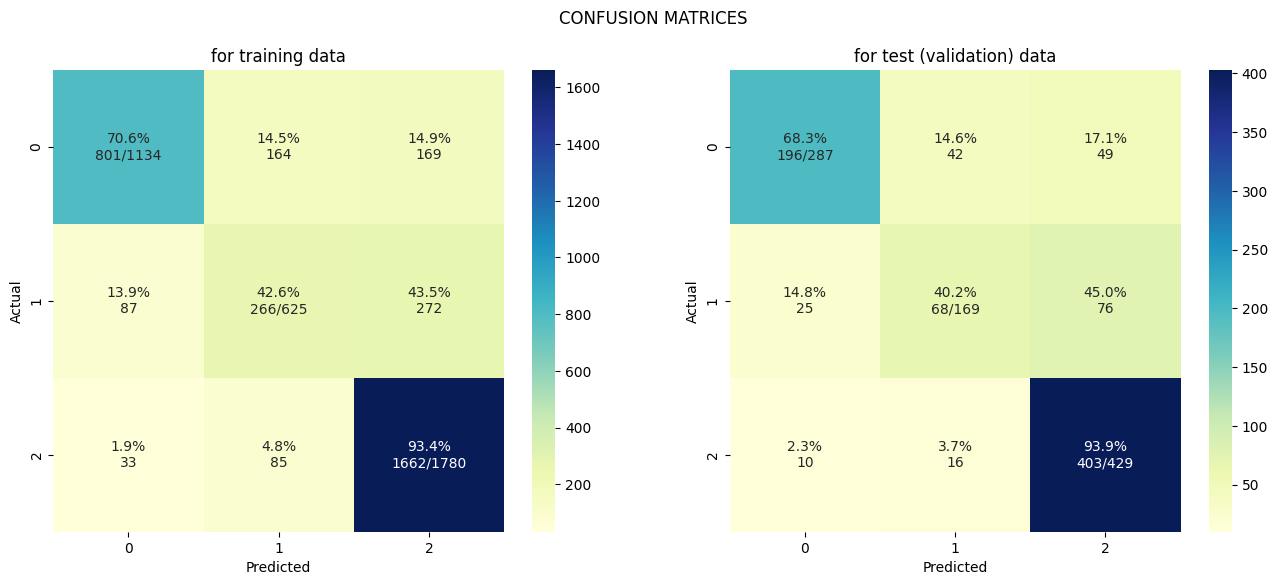

In [68]:
print(svr_CV.best_params_)
acc_metrics_calc(1,svr_CV,train,test,target,target_test)

In [69]:
# Make predictions using the testing set
svr_pred = svr_CV.predict(X_test)

In [70]:
#Using two features in the data set for plotting possibility. We can take any 2
svr_X_train = X_train.iloc[:, [2, 10]]
svr_y_train= y_train

In [71]:
svr_X_train.head()

,Father's occupation,Mother's qualification
2019,0.40,-0.60
4244,-0.40,-0.50
2324,-1.00,-0.60
376,0.40,0.45
564,0.40,-0.60


In [72]:
h = .02  # step size in the mesh

svr_CV.fit(svr_X_train, svr_y_train)

svr_X = X_test.iloc[:, [2,3]]
svr_y = y_test

In [73]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [74]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = svr_X.iloc[:, 0].min() - 1, svr_X.iloc[:, 0].max() + 1
y_min, y_max = svr_X.iloc[:, 1].min() - 1, svr_X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                     np.arange(y_min, y_max,h))
Z = svr_CV.predict(np.c_[xx.ravel(), yy.ravel()])

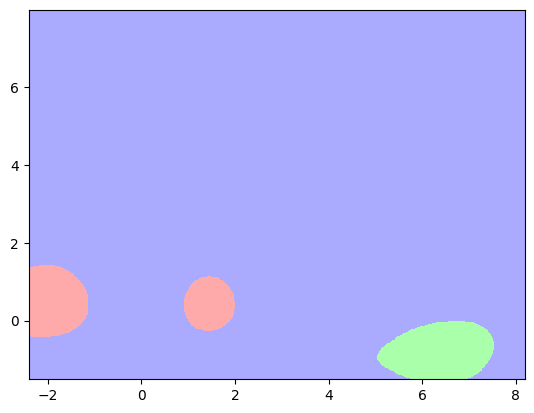

In [75]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

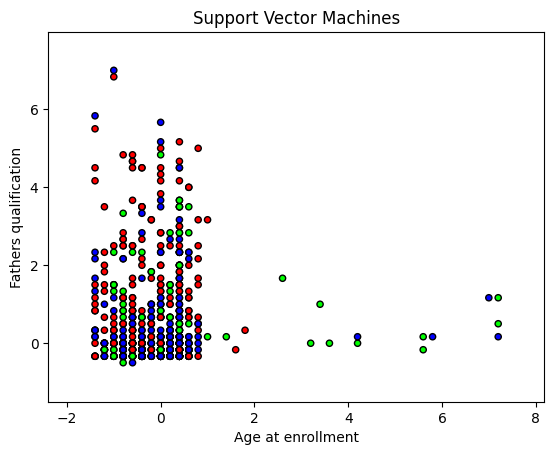

In [76]:
# Plot also the training points
plt.scatter(svr_X.iloc[:, 0], svr_X.iloc[:, 1], c=svr_y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age at enrollment')
plt.ylabel('Fathers qualification')
plt.title("Support Vector Machines")

plt.show()

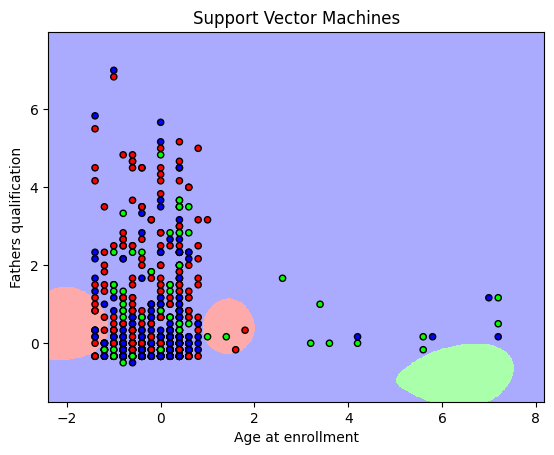

In [77]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = svr_X.iloc[:, 0].min() - 1, svr_X.iloc[:, 0].max() + 1
y_min, y_max = svr_X.iloc[:, 1].min() - 1, svr_X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svr_CV.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()

# Plot the decision boundary using pcolormesh
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points using scatter
plt.scatter(svr_X.iloc[:, 0], svr_X.iloc[:, 1], c=svr_y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age at enrollment')
plt.ylabel('Fathers qualification')
plt.title("Support Vector Machines")

plt.show()


In [78]:
sp = time.time()
time_taken = sp-st
print('This project took', time_taken, 'seconds to execute')

This project took 1060.8112268447876 seconds to execute


Cross Validation

{'max_iter_predict': 70, 'n_restarts_optimizer': 2, 'warm_start': False}
target =  [2 0 2 0 2]
ytrain =  [2 2 2 0 2]
target_test = [1 2 0 2 2]
ytest = [1 2 0 2 2]
acc of r2_score for train = 74.31
acc of r2_score for test = 80.12
acc of acc for train = 89.76
acc of acc for test = 91.95
acc of rmse for train = 45.07
acc of rmse for test = 39.6
acc of re for train = 11.49
acc of re for test = 8.98


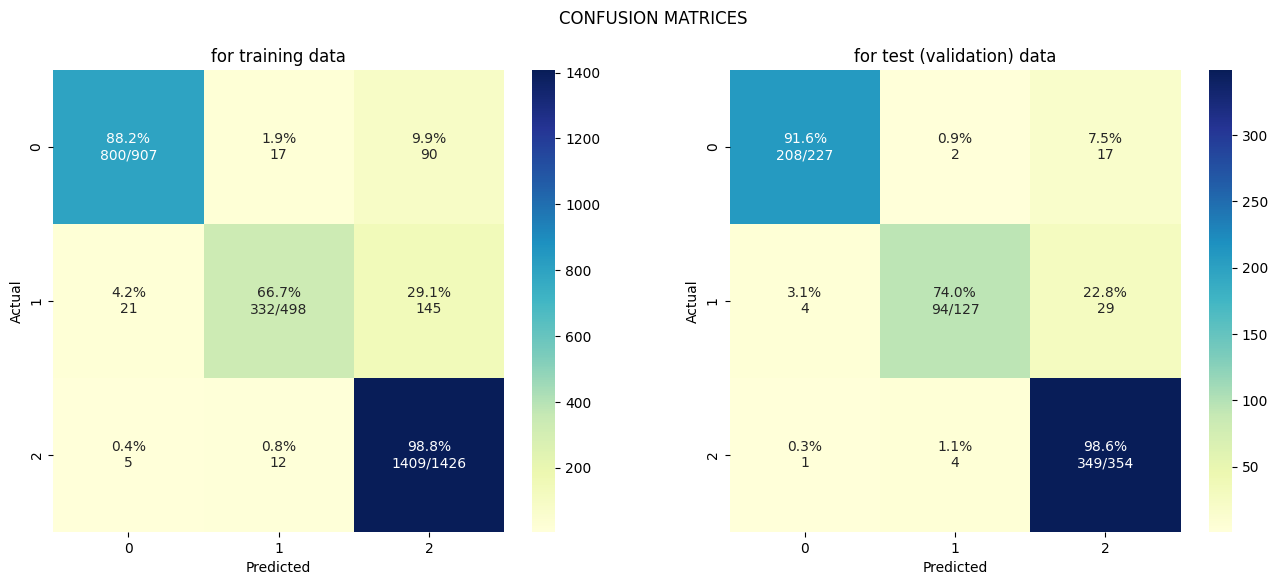

In [82]:
gpc = GaussianProcessClassifier()
param_grid = {'max_iter_predict': [70, 80, 90],
              'warm_start': [False],
              'n_restarts_optimizer': range(2,4)}
gpc_CV = GridSearchCV(estimator=gpc, param_grid=param_grid, cv=cv_train, verbose=False)
gpc_CV.fit(train, target)
print(gpc_CV.best_params_)
acc_metrics_calc(18,gpc_CV,X_train,X_test, y_train, y_test)

In [83]:
# Make predictions using the testing set
gaus_pred = gpc_CV.predict(X_test)

In [94]:
X_train

,Course,Mother's occupation,Father's occupation,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Application mode,Previous qualification,...,Marital status,Application order,Daytime/evening attendance,Nacionality,Displaced,Debtor,Gender,Scholarship holder,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled)
2019,0.71,-0.20,0.40,-0.17,-0.25,0.58,-0.50,0.63,-0.64,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
4244,-1.14,-0.60,-0.40,-0.17,1.25,0.02,1.00,0.20,-0.64,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,3.00
2324,0.00,0.80,-1.00,0.17,0.25,-0.88,0.50,-0.66,0.09,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
376,-0.14,0.80,0.40,2.33,-0.75,-5.12,-2.00,-4.72,0.09,0.00,...,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.50
564,-0.71,0.80,0.40,0.33,-0.50,0.78,0.00,0.55,-0.64,0.31,...,0.00,5.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,-0.71,-0.80,-0.40,-0.17,-0.50,0.99,-0.50,0.37,-0.64,0.00,...,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3693,-0.43,0.80,0.00,-0.17,0.25,0.13,0.00,0.12,0.00,0.00,...,0.00,4.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,-0.50
4022,-0.14,0.00,0.20,-0.17,-0.50,0.13,0.00,-0.37,0.09,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.50
111,-0.14,-0.20,0.00,-0.33,0.25,0.30,0.75,-0.46,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.50


In [84]:
#Using two features in the data set for plotting possibility. We can take any 2
gaus_X_train = X_train.iloc[:, [2, 10]]
gaus_y_train= y_train

In [85]:
h = .02  # step size in the mesh

gpc_CV.fit(gaus_X_train, gaus_y_train)

gaus_X = X_test.iloc[:, [2,3]]
gaus_y = y_test

In [86]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [87]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = gaus_X.iloc[:, 0].min() - 1, gaus_X.iloc[:, 0].max() + 1
y_min, y_max = gaus_X.iloc[:, 1].min() - 1, gaus_X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                     np.arange(y_min, y_max,h))
Z = gpc_CV.predict(np.c_[xx.ravel(), yy.ravel()])

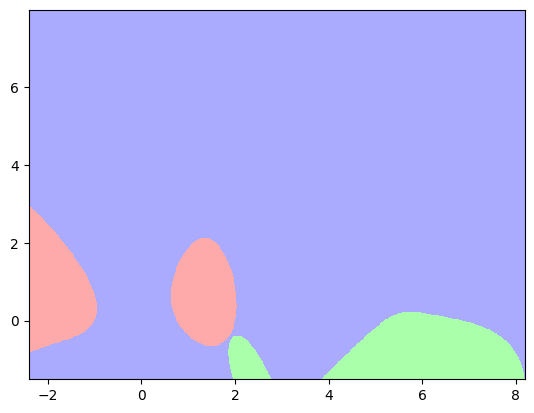

In [88]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

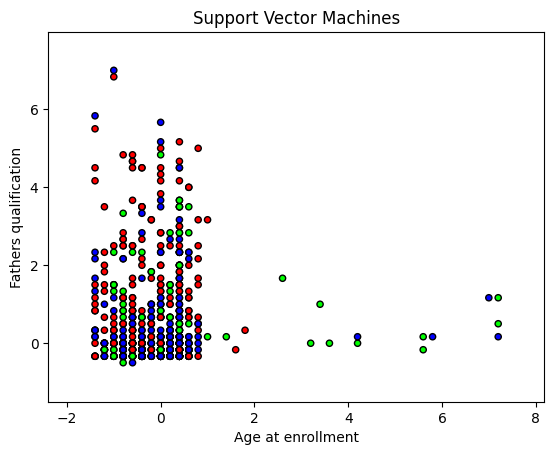

In [92]:
# Plot also the training points
plt.scatter(gaus_X.iloc[:, 0], gaus_X.iloc[:, 1], c=gaus_y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age at enrollment')
plt.ylabel('Fathers qualification')
plt.title("Gaussian Process")

plt.show()

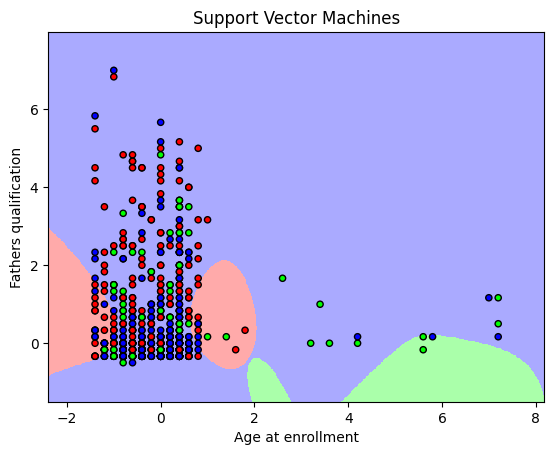

In [93]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = gaus_X.iloc[:, 0].min() - 1, gaus_X.iloc[:, 0].max() + 1
y_min, y_max = gaus_X.iloc[:, 1].min() - 1, gaus_X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = gpc_CV.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()

# Plot the decision boundary using pcolormesh
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points using scatter
plt.scatter(gaus_X.iloc[:, 0], gaus_X.iloc[:, 1], c=gaus_y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age at enrollment')
plt.ylabel('Fathers qualification')
plt.title("Support Vector Machines")

plt.show()

In [2]:
X= train.fit_transform(train)

NameError: name 'train' is not defined